In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd

import contextily as ctx
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing #通过移除均值并缩放到单位方差来标准化特征

import os



In [288]:
# ML = r"C:\Users\RCY19\OneDrive\Desktop\ML"
# os.listdir(ML) 

['.ipynb_checkpoints',
 '50m buffer .csv',
 'GSV_REGRESSION.ipynb',
 'LD+PSP+MASK.csv',
 'nomarl vechicle psp mask.csv',
 'pspnet_merged.csv',
 'Untitled.ipynb',
 '合并导出.ipynb']

In [5]:
# 讀取electricity_cleaned.cs
# GSV= pd.read_csv(os.path.join(ML,'LD+PSP+MASK.csv'))
GSV= pd.read_csv("Micomobilit.csv")

GSV.columns

Index(['ID', 'accidents_M', 'injury_M', 'accidents', 'injury', 'building',
       'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper',
       'streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard',
       'ashcan', 'earth', 'van', 'plant', 'chair', 'bulletin board', 'grass',
       'bicycle', 'ceiling', 'minibike', 'windowpane', 'mountain', 'column',
       'bridge', 'water', 'sculpture', 'fountain', 'booth', 'lamp', 'pier',
       'glass', 'person_number', 'car_number', 'bus_number', 'truck_number',
       'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number',
       'bench_number', 'dining table', 'stop sign', 'dog',
       'Tree Canopy Percentage', 'Grass/Shrubs Percentage',
       'Bare Soil Percentage', 'Water Percentage', 'Buildings Percentage',
       'Roads Percentage', 'Other Impervious Percentage',
       'Railroads Percentage'],
      dtype='object')

In [6]:
GSV.head()

ID  accidents_M  injury_M  accidents  injury  building       sky  \
0  7439            0         0          0       0       0.0  0.000000   
1  7438            0         0          0       0       0.0  0.000000   
2  7437            0         0          0       0       0.0  0.033570   
3  7436            0         0          0       0       0.0  0.000000   
4  7435            0         0          0       0       0.0  0.057227   

       tree     road  sidewalk  ...  stop sign  dog  Tree Canopy Percentage  \
0  0.000000  0.00000  0.000000  ...        0.0  0.0               59.408676   
1  0.000000  0.00000  0.000000  ...        0.0  0.0               40.540665   
2  0.854688  0.00000  0.000000  ...        0.0  0.0               64.122652   
3  0.000000  0.00000  0.000000  ...        0.0  0.0               20.597555   
4  0.481555  0.29209  0.018043  ...        0.0  0.0               51.439843   

   Grass/Shrubs Percentage  Bare Soil Percentage  Water Percentage  \
0                 2.158976                   0.0               0.0   
1                13.007276                   0.0               0.0   
2                 1.457858                   0.0               0.0   
3                51.224582                   0.0               0.0   
4                11.196312                   0.0               0.0   

   Buildings Percentage  Roads Percentage  Other Impervious Percentage  \
0              0.000000          9.941052                     6.345215   
1              0.000000          0.000000                    24.303215   
2              1.312811          3.568888                     7.620033   
3              0.000000          0.898920                     5.366728   
4              0.000000          8.492161                     6.954851   

   Railroads Percentage  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 60 columns]

# Landcover Corr

In [39]:
selected_columns_Landcover = ['accidents_M','Tree Canopy Percentage', 'Grass/Shrubs Percentage','Buildings Percentage','Other Impervious Percentage', 'Roads Percentage', 'Railroads Percentage'] 
GSV_landcover = GSV[selected_columns_Landcover]
GSV_landcover

accidents_M  Tree Canopy Percentage  Grass/Shrubs Percentage  \
0               0               59.408676                 2.158976   
1               0               40.540665                13.007276   
2               0               64.122652                 1.457858   
3               0               20.597555                51.224582   
4               0               51.439843                11.196312   
...           ...                     ...                      ...   
7621            0                1.259227                 0.010163   
7622            0                0.073909                 0.015706   
7623            0                0.155209                 0.000000   
7624            0               15.939431                 0.850879   
7625            0               20.921832                 0.072061   

      Buildings Percentage  Other Impervious Percentage  Roads Percentage  \
0                 0.000000                     6.345215          9.941052   
1                 0.000000                    24.303215          0.000000   
2                 1.312811                     7.620033          3.568888   
3                 0.000000                     5.366728          0.898920   
4                 0.000000                     6.954851          8.492161   
...                    ...                          ...               ...   
7621             31.619257                    21.798579         23.402408   
7622             26.102863                    22.551529         29.342855   
7623             17.279035                    30.490295         30.160475   
7624             11.030016                     8.597482         41.657967   
7625             10.785192                    10.569008         35.740616   

      Railroads Percentage  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
7621                   0.0  
7622                   0.0  
7623                   0.0  
7624                   0.0  
7625                   0.0  

[7626 rows x 7 columns]

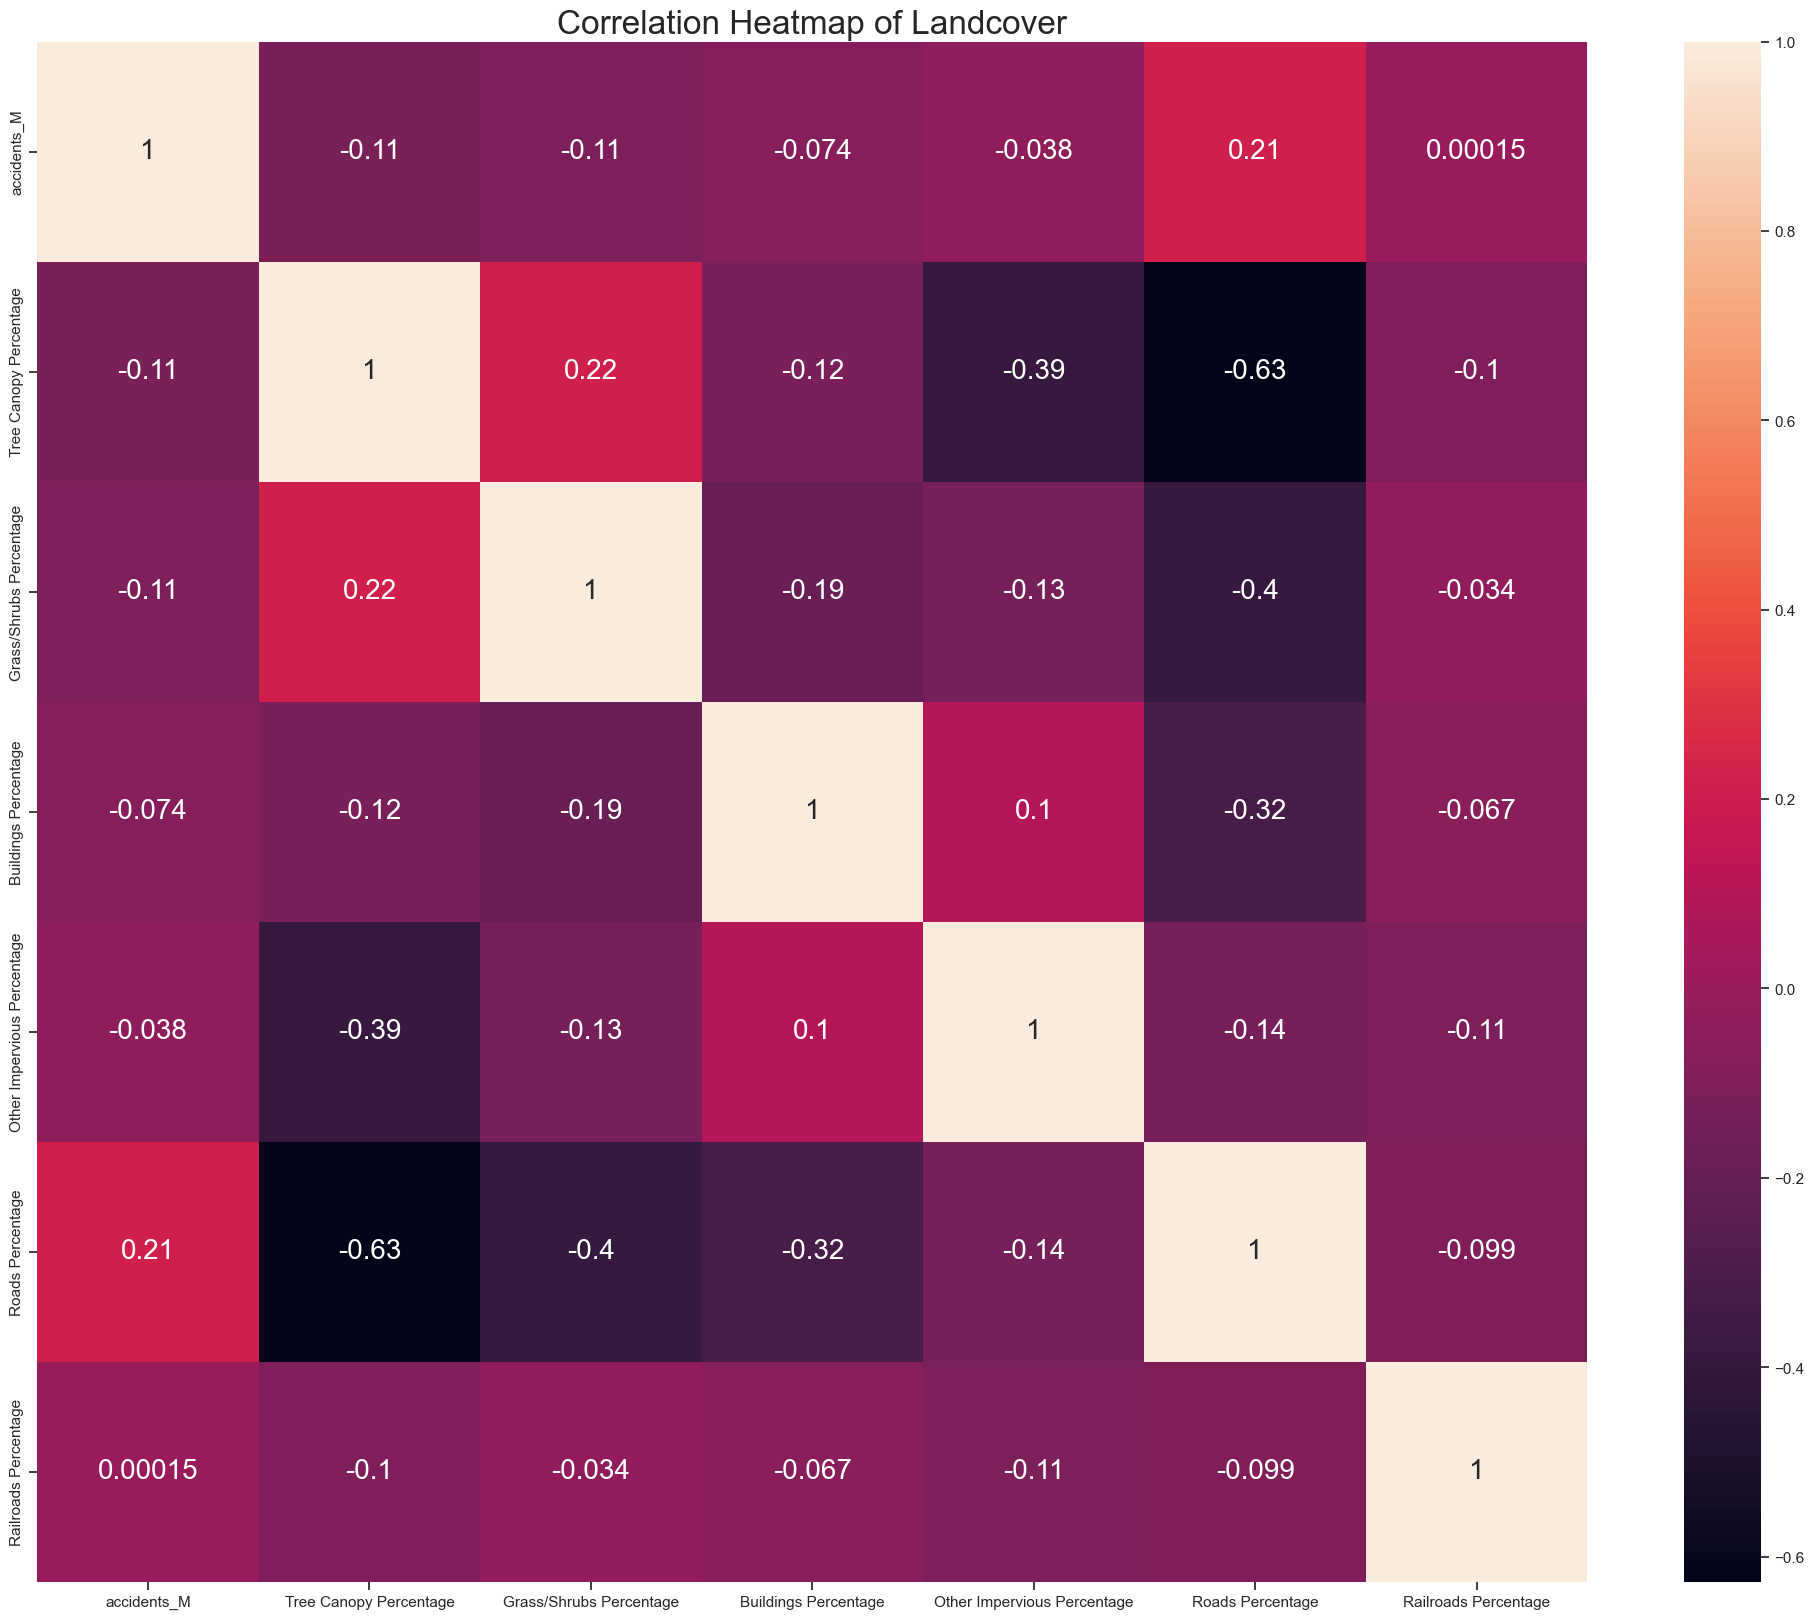

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_landcover.corr(), annot=True,annot_kws={'size':20})

# 添加标题
plt.title('Correlation Heatmap of Landcover', fontsize=24)

# 将图表保存为图片
plt.savefig('Correlation Heatmap of Landcover.png')

# 显示图表
plt.show()


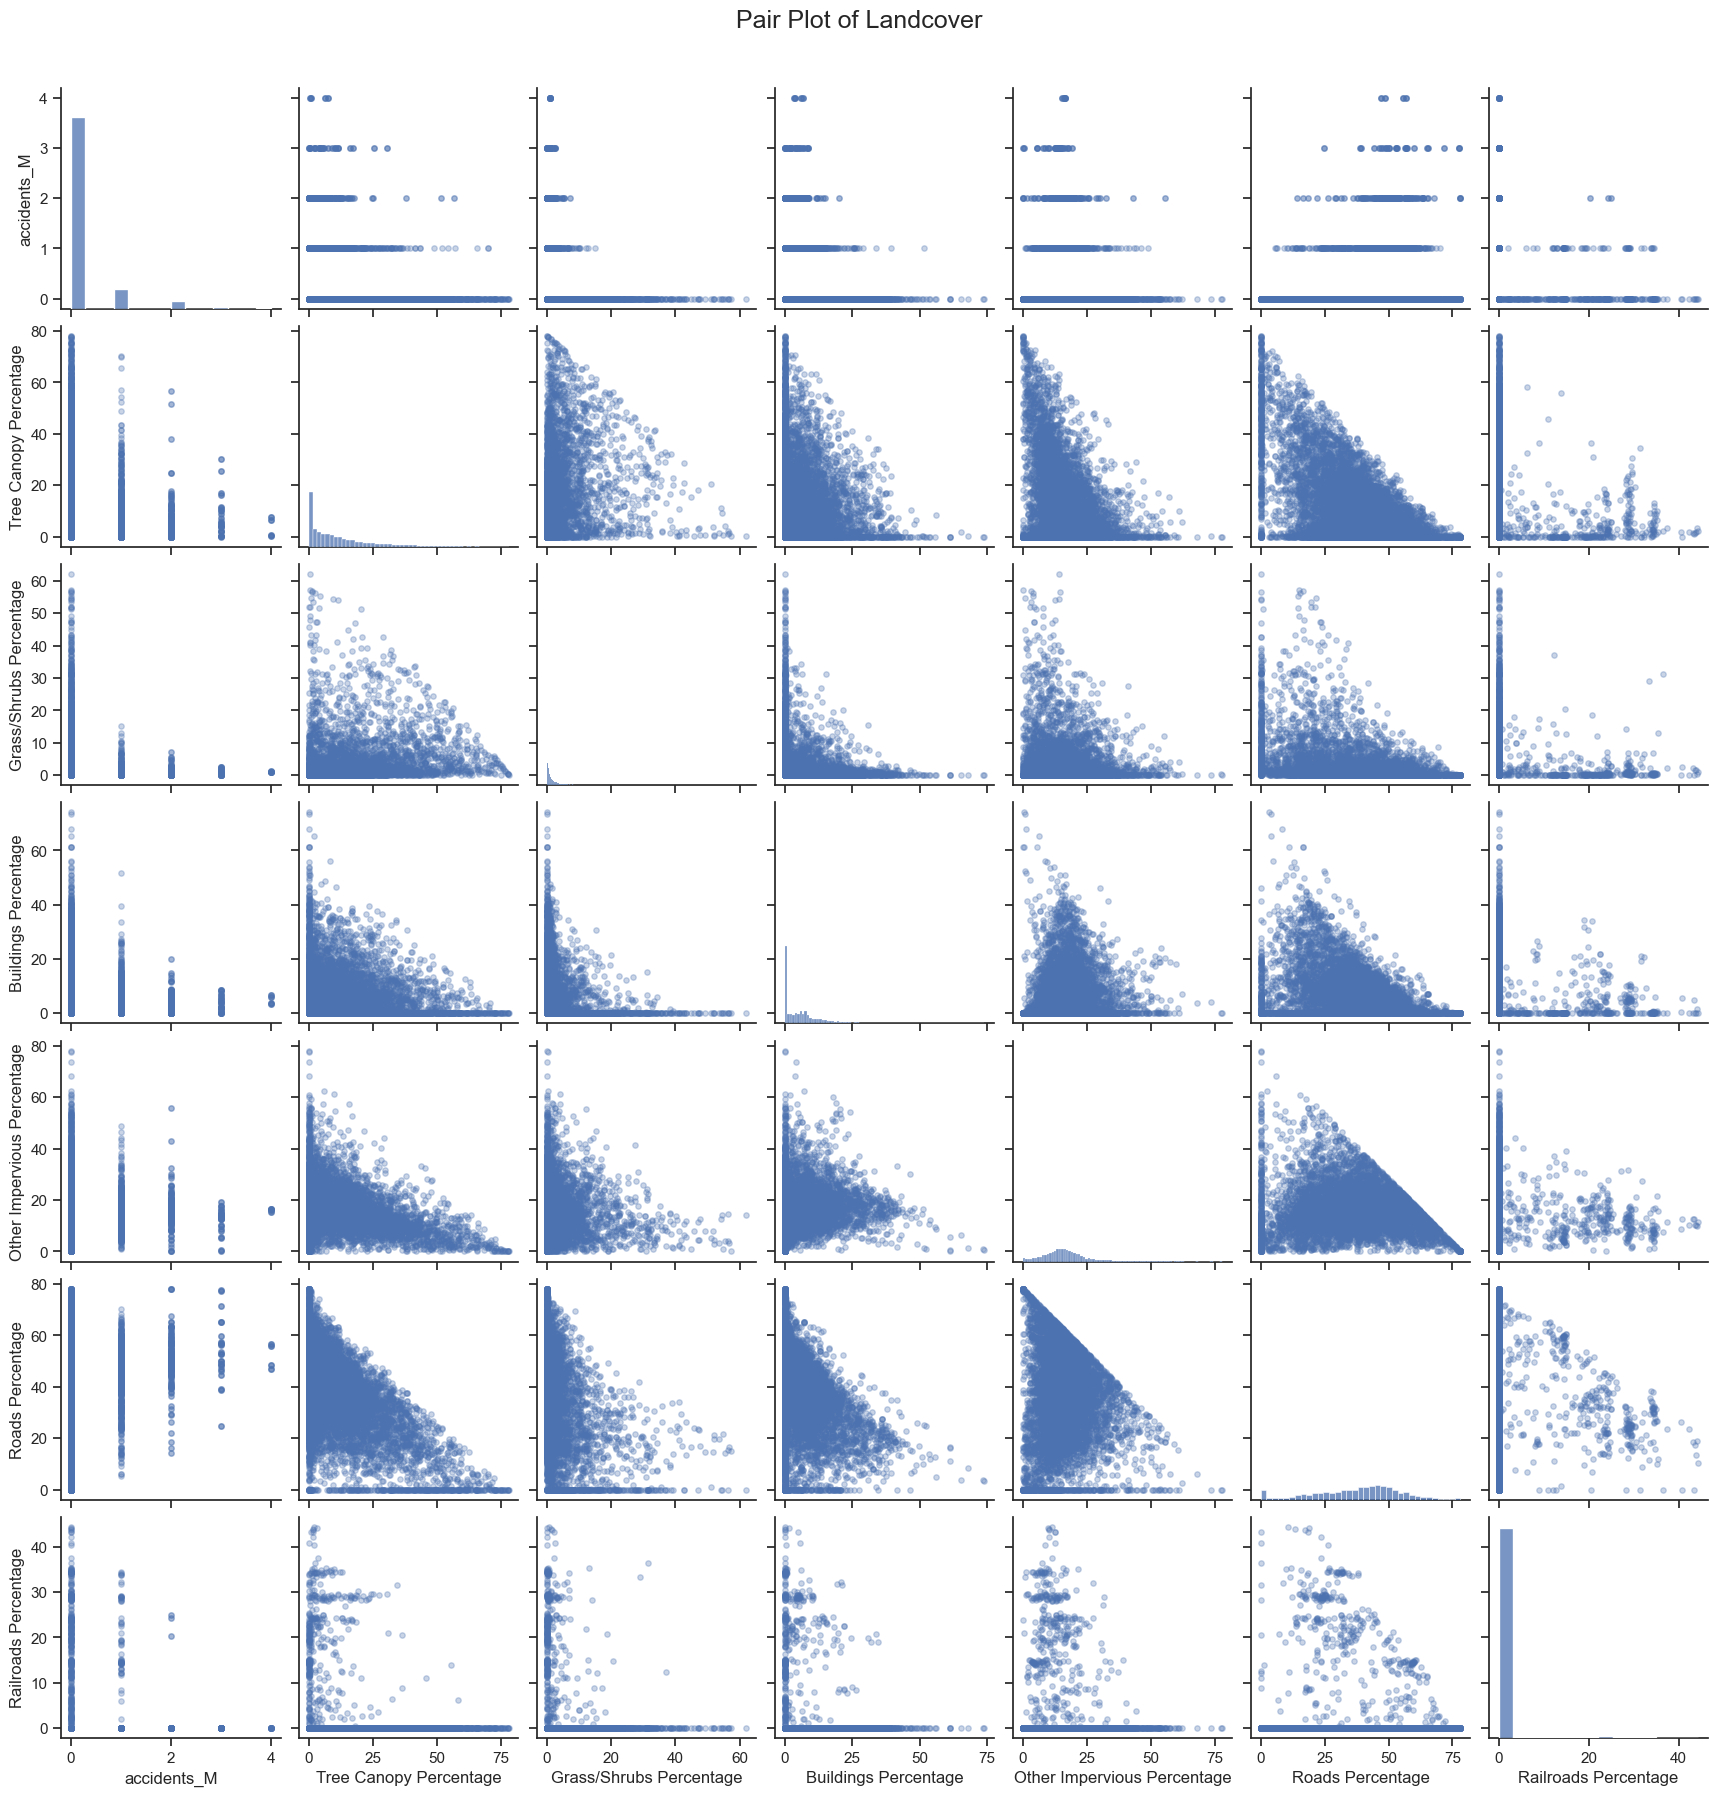

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_landcover, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of Landcover", y=1.03, fontsize=18)

# 保存图表
g.savefig("Pair Plot of Landcover.jpg")


In [37]:

# 储存图片
g.savefig("pairplot.jpg", dpi=300)


## Psp_net Corr

In [47]:
selected_columns_Psp = ['accidents_M','building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper','streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard', 'ashcan', 'earth', 'van','plant', 'bulletin board', 'minibike', 'bridge', 'water'] 
GSV_Psp = GSV[selected_columns_Psp]
GSV_Psp

accidents_M  building       sky      tree      road  sidewalk    person  \
0               0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1               0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2               0  0.000000  0.033570  0.854688  0.000000  0.000000  0.000000   
3               0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4               0  0.000000  0.057227  0.481555  0.292090  0.018043  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
7621            0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7622            0  0.547926  0.021094  0.000336  0.279215  0.040379  0.003883   
7623            0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7624            0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7625            0  0.360715  0.020207  0.139648  0.365035  0.014016  0.003258   

           car  skyscraper  streetlight  ...   awning  signboard  ashcan  \
0     0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
1     0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
2     0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
3     0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
4     0.003078    0.000000     0.000574  ...  0.00000   0.007805     0.0   
...        ...         ...          ...  ...      ...        ...     ...   
7621  0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
7622  0.046504    0.000000     0.001082  ...  0.00398   0.000000     0.0   
7623  0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
7624  0.000000    0.000000     0.000000  ...  0.00000   0.000000     0.0   
7625  0.063336    0.027258     0.000711  ...  0.00000   0.000000     0.0   

         earth       van     plant  bulletin board  minibike  bridge     water  
0     0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
1     0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
2     0.051691  0.000000  0.013559             0.0  0.000000     0.0  0.040543  
3     0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
4     0.017918  0.015699  0.002914             0.0  0.000000     0.0  0.000000  
...        ...       ...       ...             ...       ...     ...       ...  
7621  0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
7622  0.000000  0.043555  0.000000             0.0  0.000000     0.0  0.000000  
7623  0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
7624  0.000000  0.000000  0.000000             0.0  0.000000     0.0  0.000000  
7625  0.000000  0.000941  0.000000             0.0  0.001406     0.0  0.000000  

[7626 rows x 23 columns]

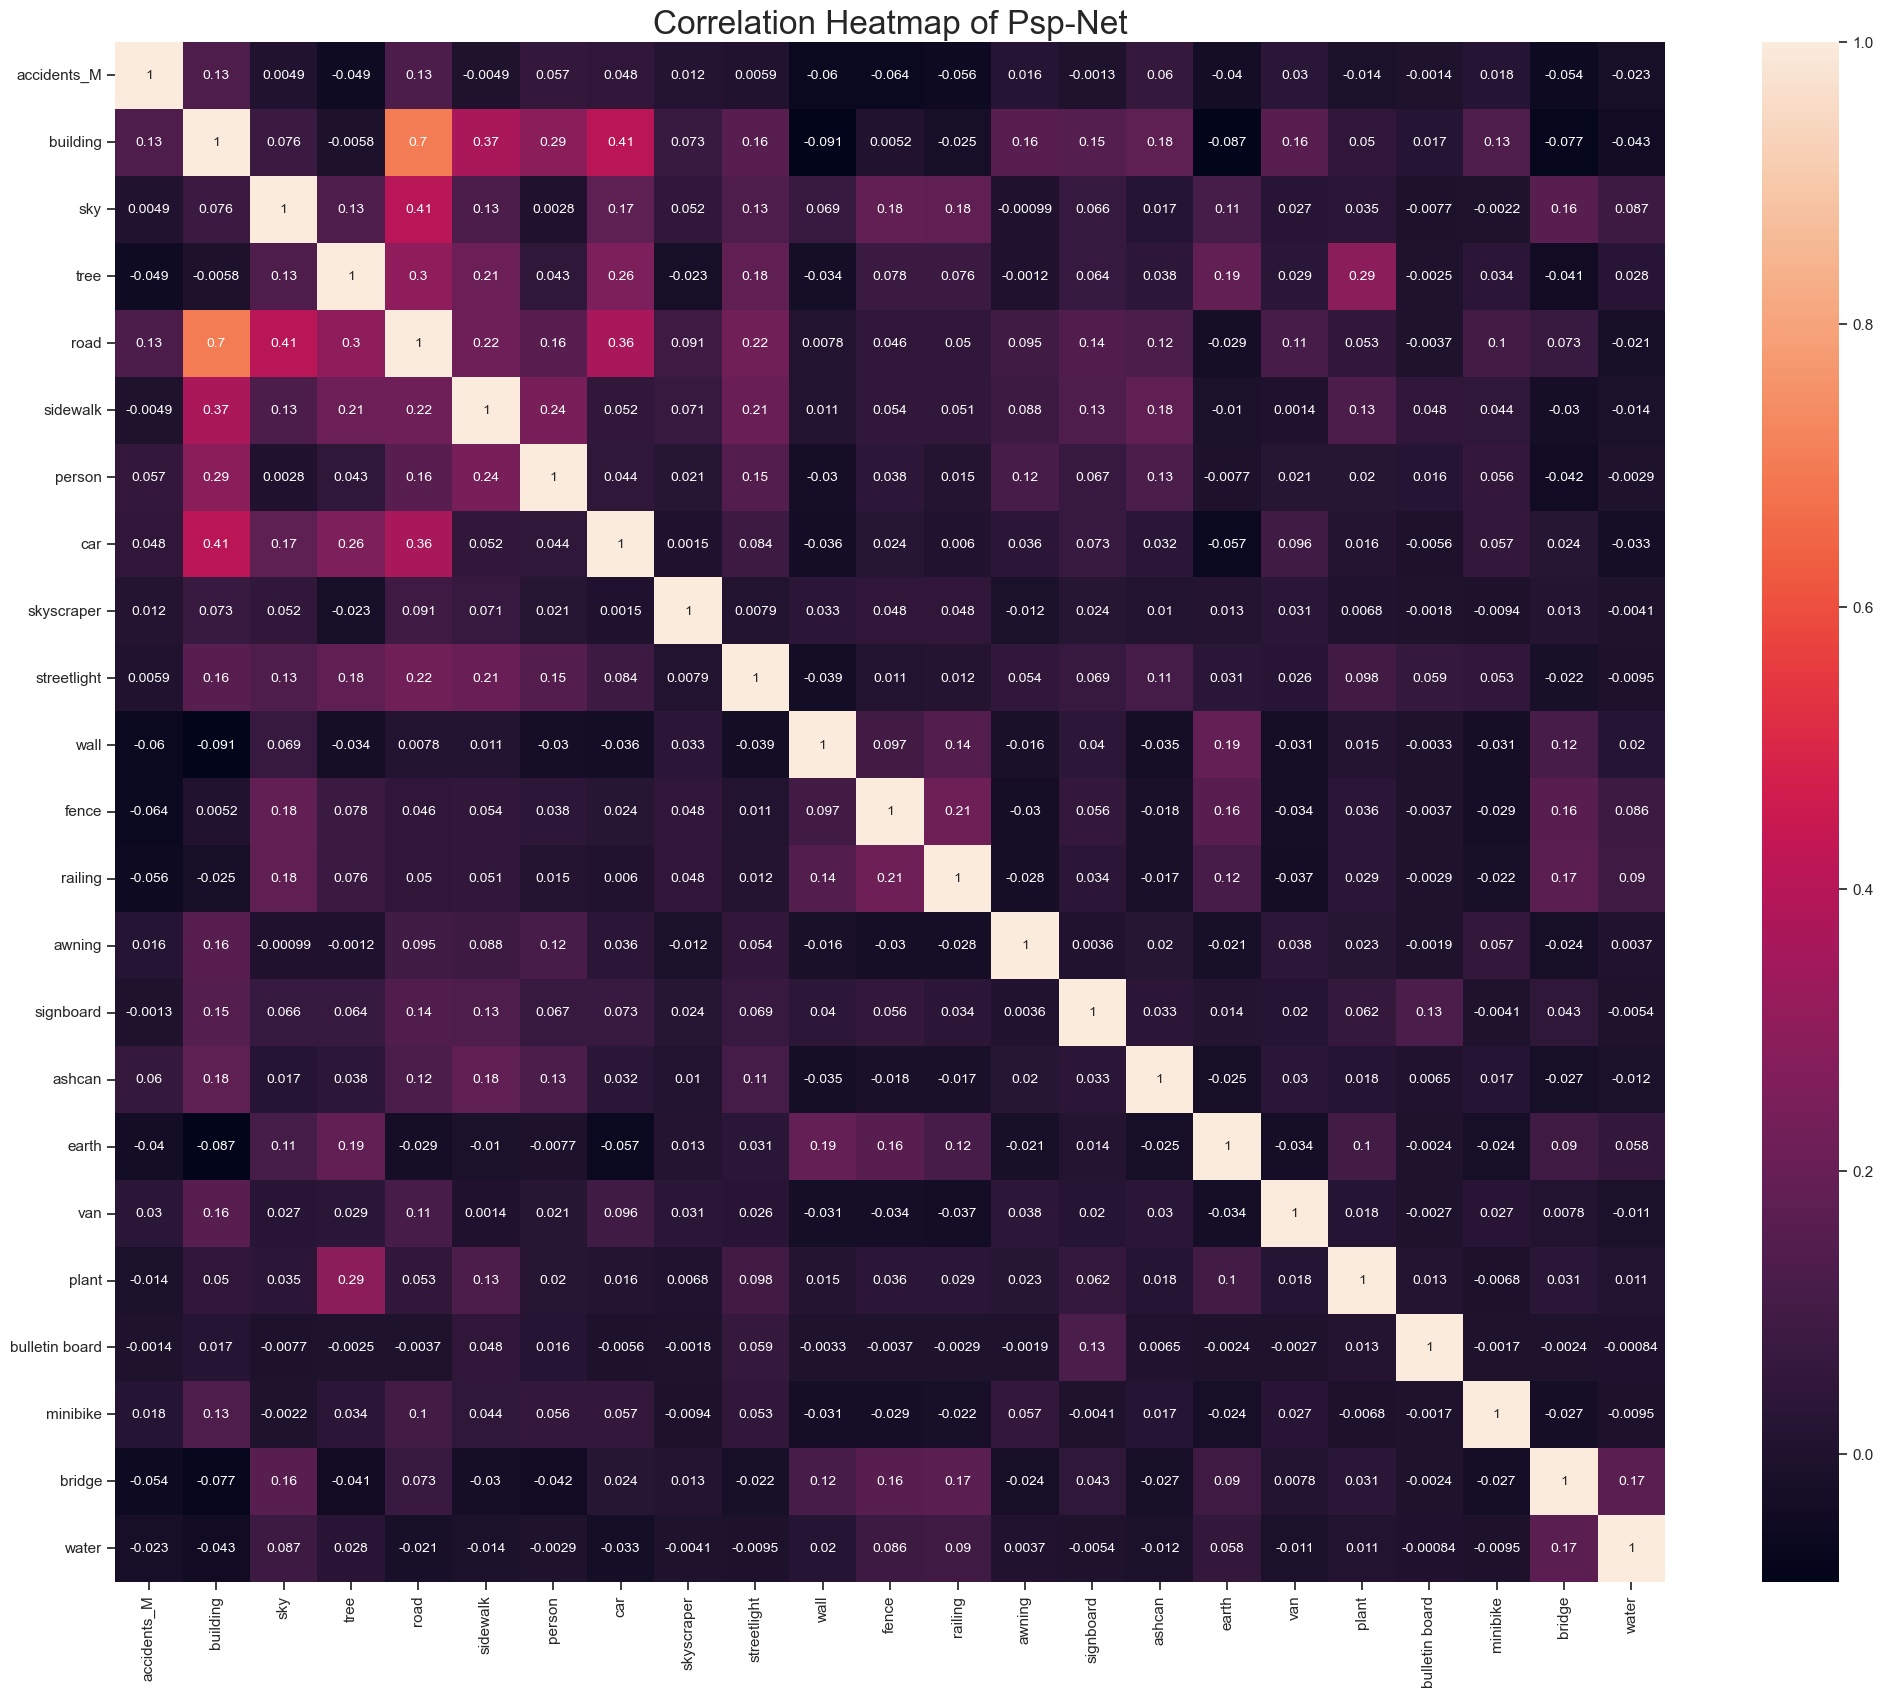

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_Psp.corr(), annot=True,annot_kws={'size':10})

# 添加标题
plt.title('Correlation Heatmap of Psp-Net', fontsize=24)

# 将图表保存为图片
plt.savefig('Correlation Heatmap of Psp-Net.png')

# 显示图表
plt.show()

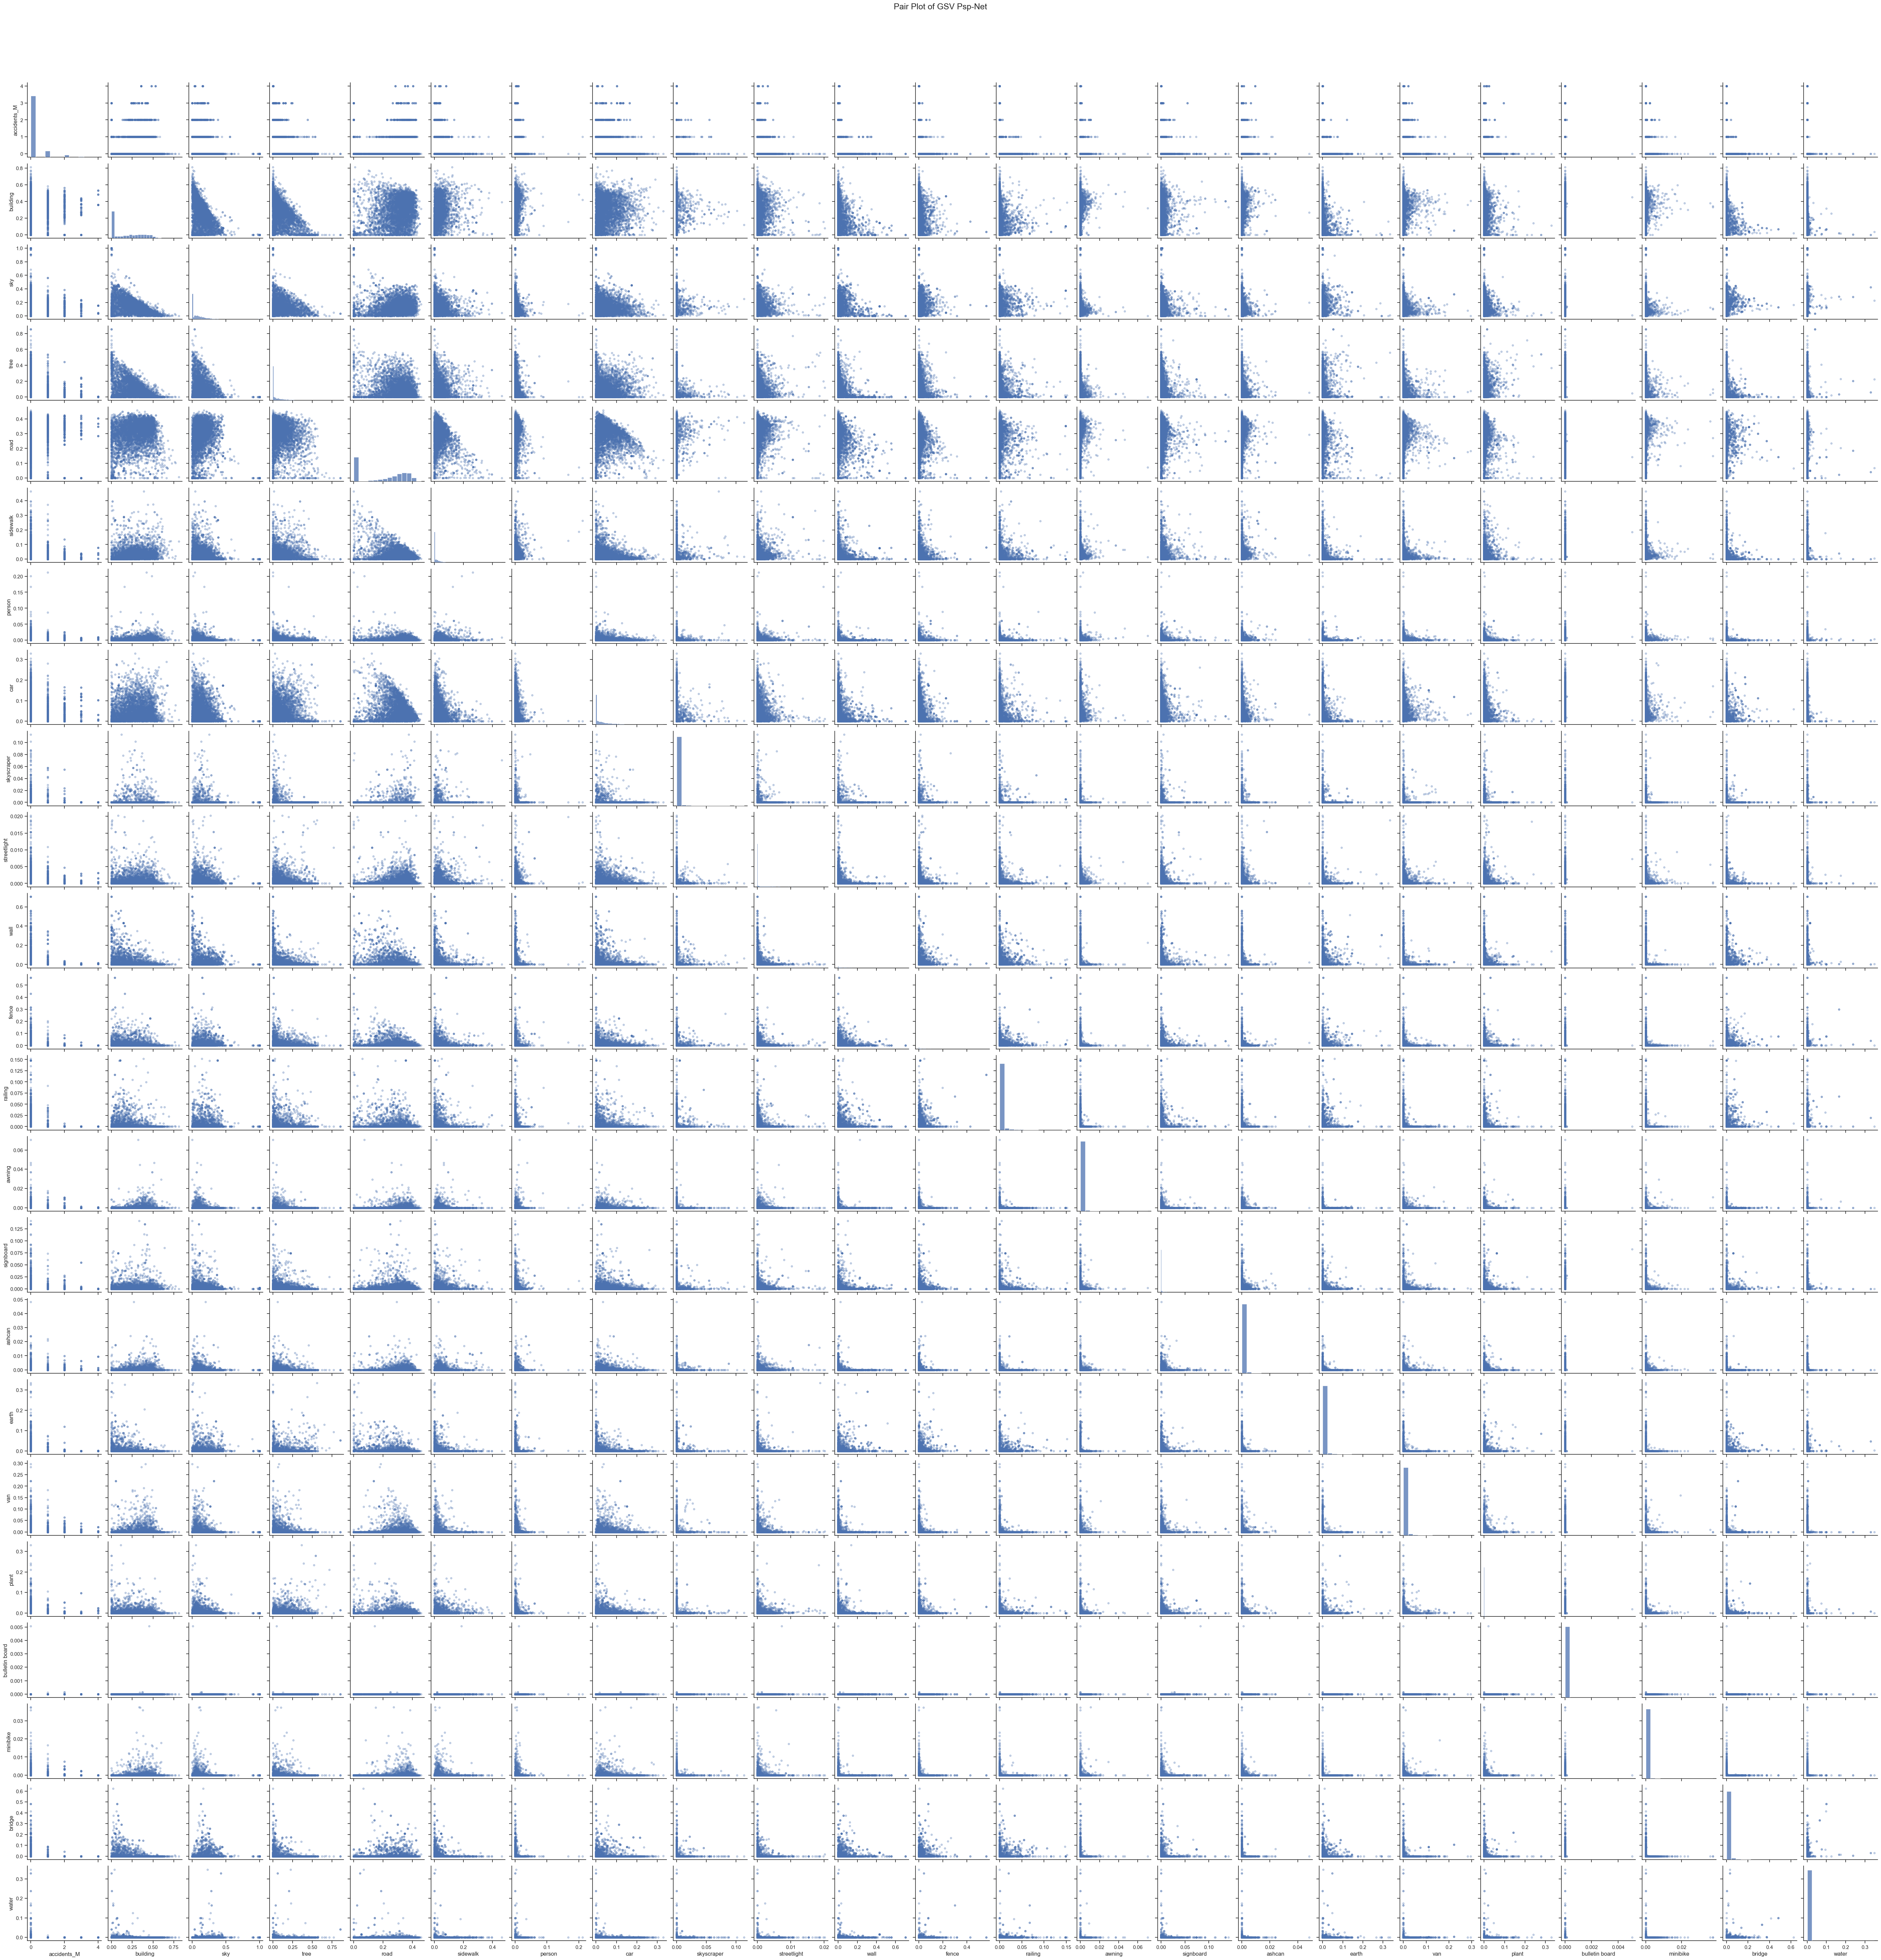

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_Psp, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of GSV Psp-Net", y=1.03, fontsize=18)

# 保存图表
g.savefig("Pair Plot of GSV Psp-Net.jpg")


## Mask-Rcnn Corr

In [55]:
selected_columns_rcnn = ['accidents_M','person_number', 
              'car_number', 'bus_number', 'truck_number', 'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number', 
              'bench_number',  'stop sign'] 
GSV_CNN = GSV[selected_columns_rcnn]
GSV_CNN

accidents_M  person_number  car_number  bus_number  truck_number  \
0               0            0.0         0.0         0.0           0.0   
1               0            0.0         0.0         0.0           0.0   
2               0            0.0         0.0         0.0           0.0   
3               0            0.0         0.0         0.0           0.0   
4               0            0.0         4.0         0.0           3.0   
...           ...            ...         ...         ...           ...   
7621            0            0.0         0.0         0.0           0.0   
7622            0           18.0         5.0         0.0           1.0   
7623            0            0.0         0.0         0.0           0.0   
7624            0            0.0         0.0         0.0           0.0   
7625            0            5.0        13.0         0.0           2.0   

      motorcycle_number  traffic light  fire hydrant  bicycle_number  \
0                   0.0            0.0           0.0             0.0   
1                   0.0            0.0           0.0             0.0   
2                   0.0            0.0           0.0             0.0   
3                   0.0            0.0           0.0             0.0   
4                   0.0            0.0           0.0             0.0   
...                 ...            ...           ...             ...   
7621                0.0            0.0           0.0             0.0   
7622                0.0           10.0           0.0             2.0   
7623                0.0            0.0           0.0             0.0   
7624                0.0            0.0           0.0             0.0   
7625                0.0            0.0           0.0             2.0   

      bench_number  stop sign  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              0.0        0.0  
4              0.0        0.0  
...            ...        ...  
7621           0.0        0.0  
7622           0.0        0.0  
7623           0.0        0.0  
7624           0.0        0.0  
7625           0.0        0.0  

[7626 rows x 11 columns]

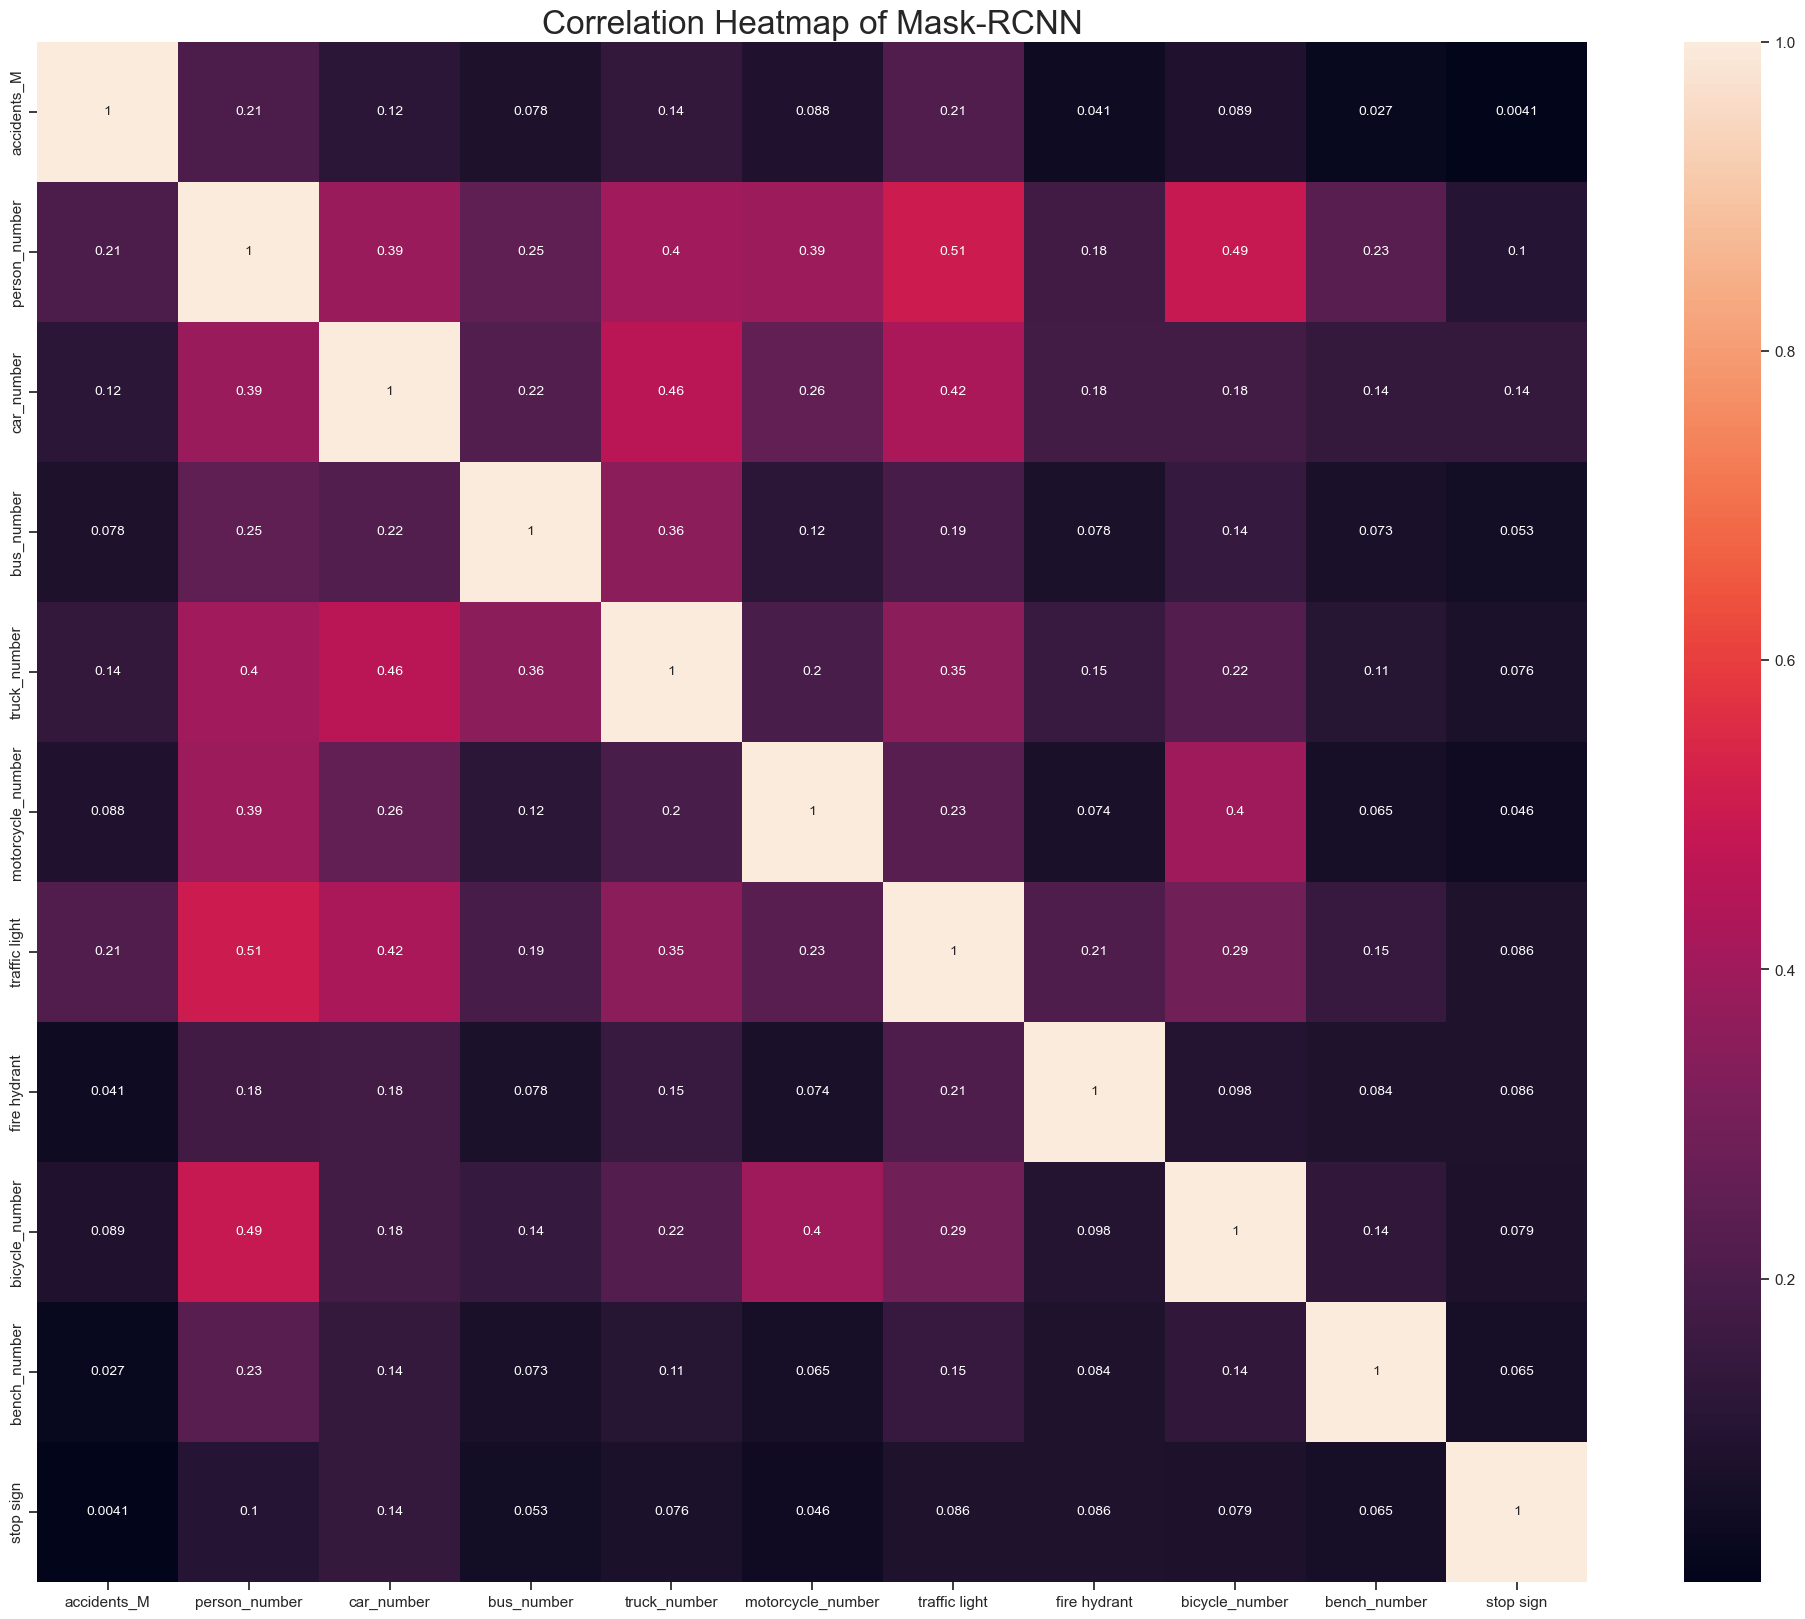

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_CNN.corr(), annot=True,annot_kws={'size':10})

# 添加标题
plt.title('Correlation Heatmap of Mask-RCNN', fontsize=24)

# 将图表保存为图片
plt.savefig('Correlation Heatmap of Mask-RCNN')

# 显示图表
plt.show()

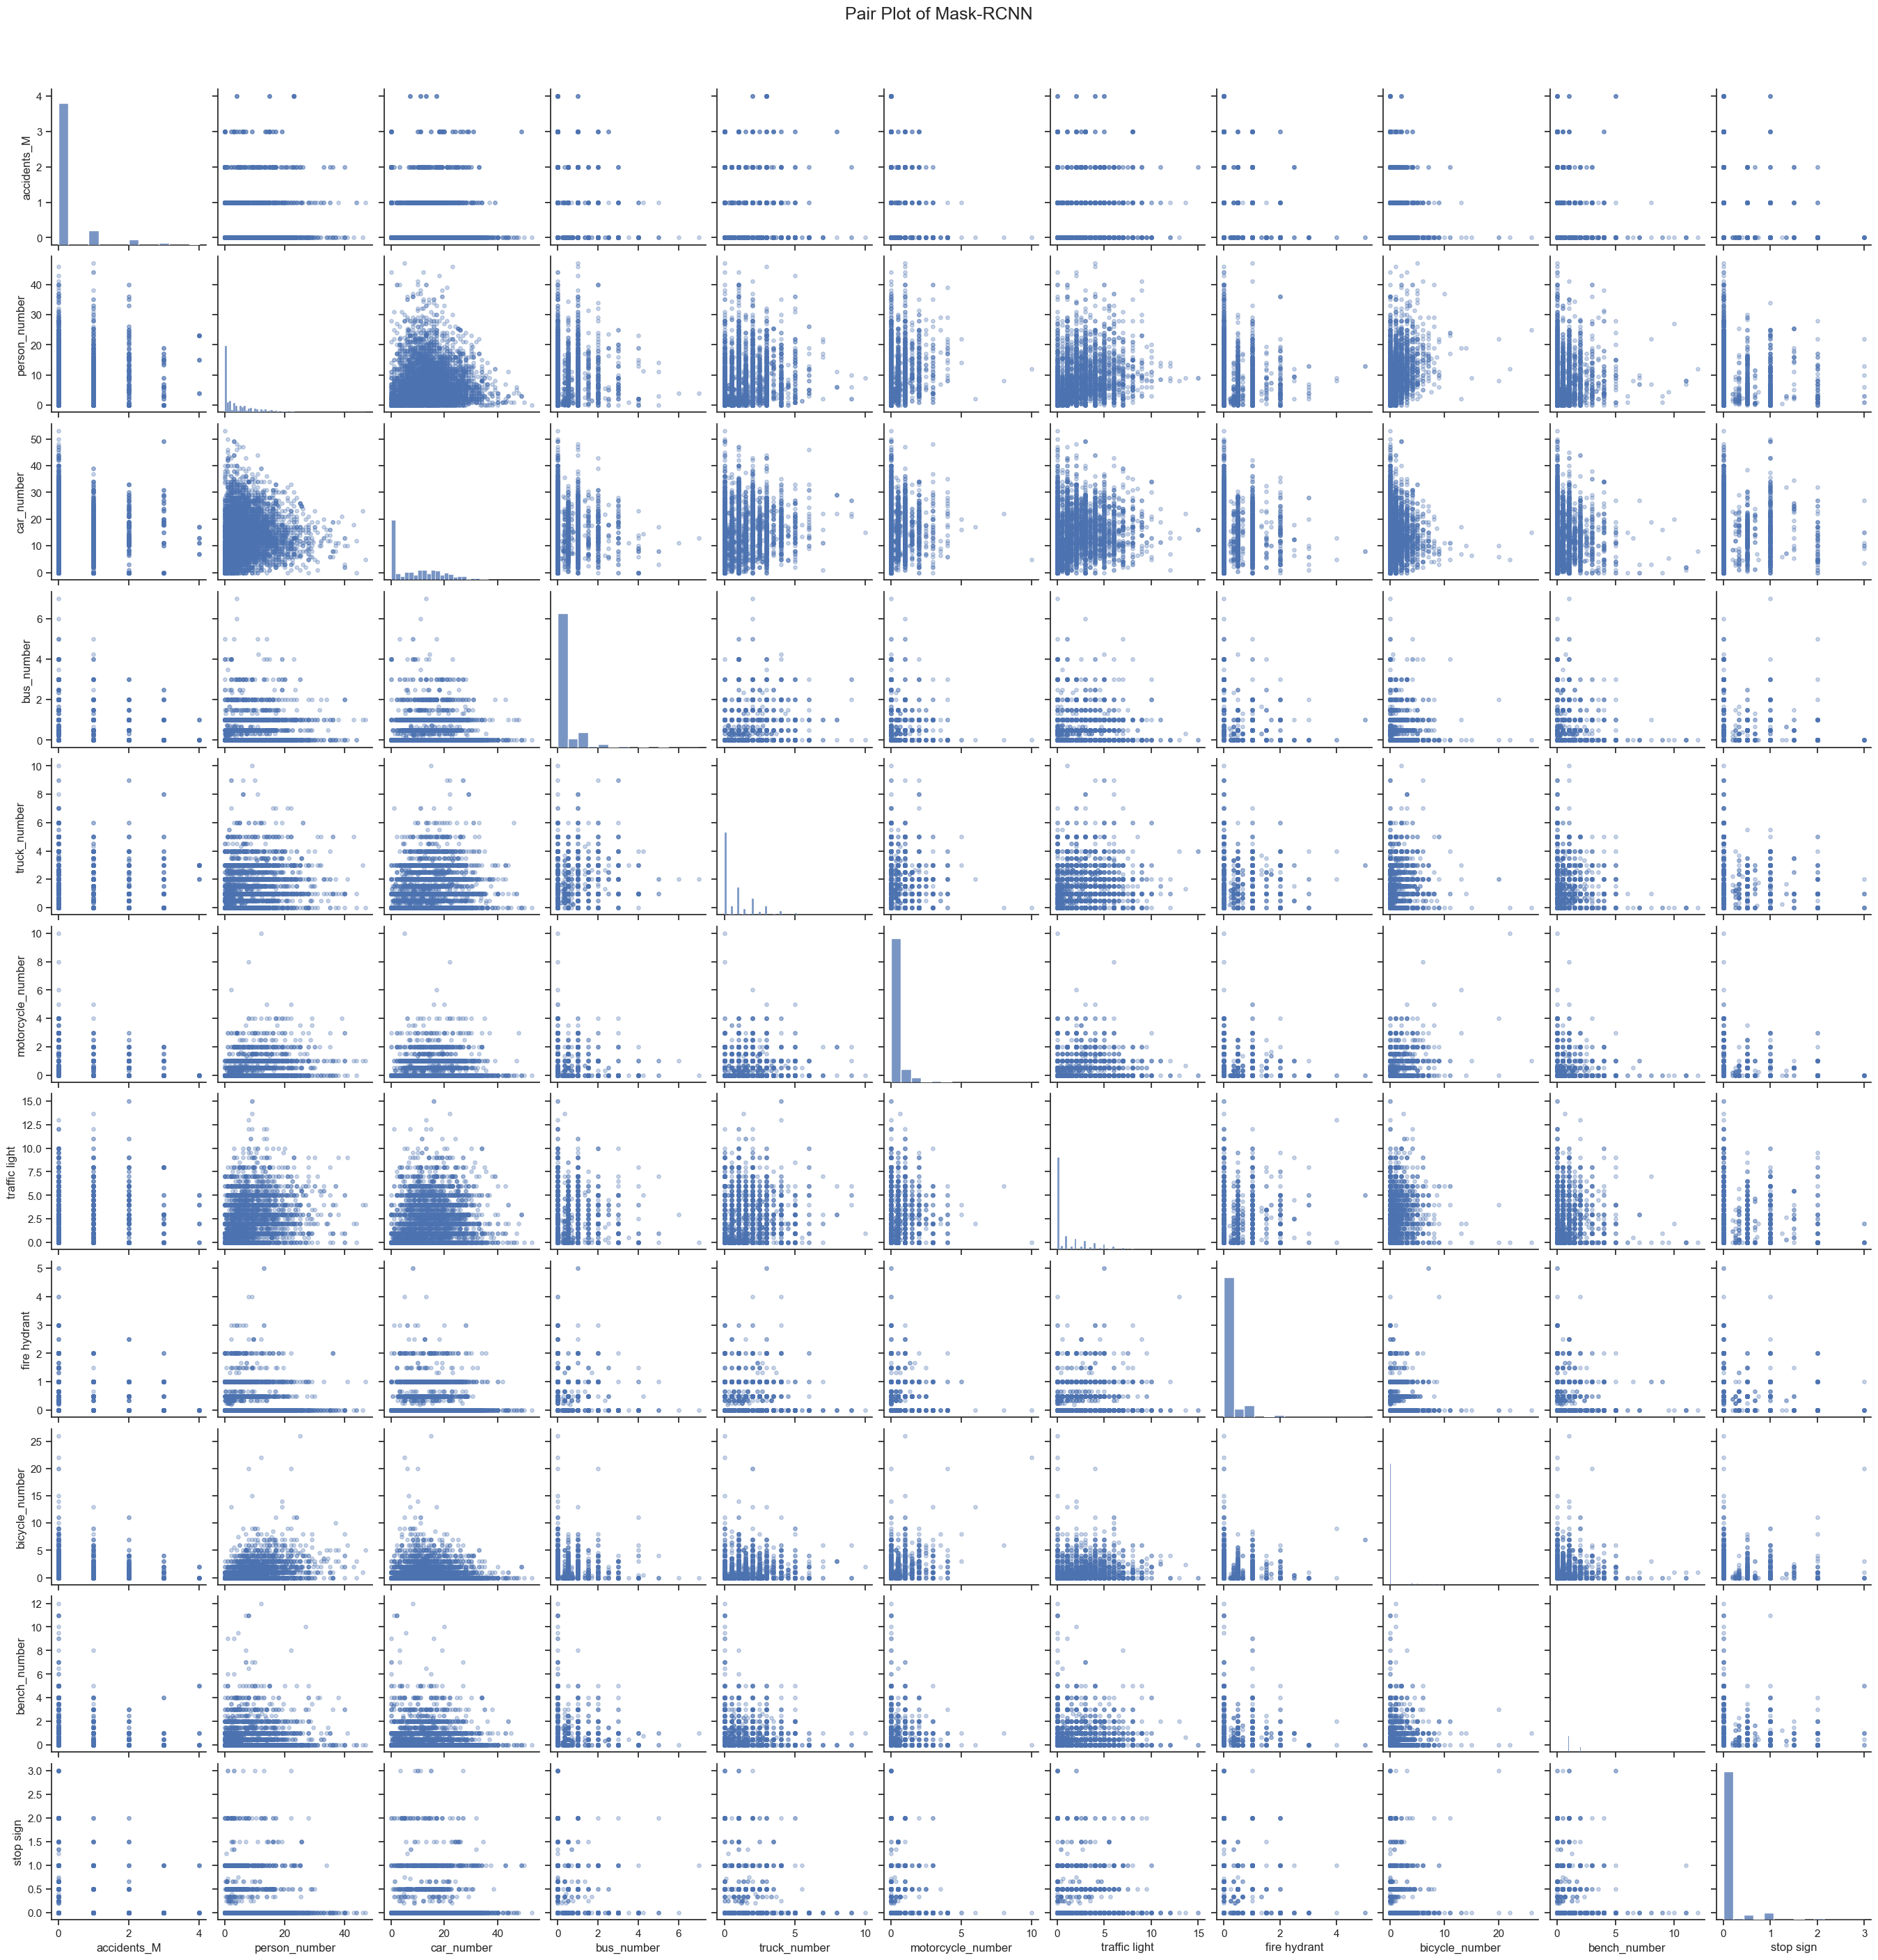

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_CNN, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of Mask-RCNN", y=1.03, fontsize=18)

# 保存图表
g.savefig("Pair Plot of GSV Mask-RCNN.jpg")
